<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Statistical-Data-Analysis-2/blob/master/LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install boolean.py


In [2]:
pip install networkx

In [ ]:
import boolean


In [4]:
variables, functions =  ['x1', 'x2', 'x3'], ['x1 | ~x2', 'x3', 'x2 & ~x1']


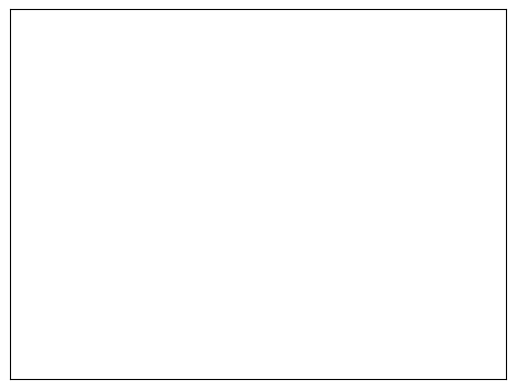

In [5]:
import networkx as nx
import boolean as bool
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random


class BN():

    __bool_algebra = bool.BooleanAlgebra()


    """
    Helper method for converting a non-negative integer into a state in the form of a tuple of 0s and 1s.

        Args:
            x (int): A state number

        Returns:
            tuple[int, ...]: A tuple of 0s and 1s representing the Boolean network state.
    """
    def __int_to_state(self, x: int) -> tuple[int, ...]:

        binary_str = format(x,'0'+str(self.num_nodes)+'b')
        state = [int(char) for char in binary_str]

        return tuple(state)


    """
    Converts a Boolean network state from a tuple of 0s and 1s into a binary string.

        Args:
            state (tuple[int, ...]): A tuple of 0s and 1s representing the Boolean network state

        Returns:
            str: A binary string representing the Boolean network state
    """
    @staticmethod
    def __state_to_binary_str(state: tuple[int, ...]) -> str:
        bin_str = ''
        for bit in state:
            bin_str += str(bit)

        return bin_str


    """
    Class constructor

        Args:
            list_of_nodes (list[str]): A list of node names

            list_of_functions (list[str]): A list of strings representing the Boolean functions for the corresponding nodes
                in the list_of_nodes, e.g. '(x0 & ~x1) | x2', where 'x0', 'x1', and 'x2' are node names.

    """
    def __init__(self, list_of_nodes: list[str], list_of_functions: list[str]):

        self.num_nodes = len(list_of_nodes)

        self.node_names = list_of_nodes

        self.list_of_nodes = []
        for node_name in list_of_nodes:
            node = self.__bool_algebra.Symbol(node_name)
            self.list_of_nodes.append(node)

        self.functions = []
        for fun in list_of_functions:
            self.functions.append(self.__bool_algebra.parse(fun,simplify=True))


    """
    Computes the states reachable from the given state in one step of asynchronous update.

        Args:
            state (tuple[int, ...]): A tuple of 0s and 1s representing the Boolean network state.

        Returns:
            set[tuple[int, ...]]: A set of tuples of 0s and 1s representing the Boolean network states reachable
                in one step from the given state.
    """
    def get_neighbor_states(self, state: tuple[int, ...]) -> set[tuple[int, ...]]:

        ################################################################################
        # Please implement your solution here

        neighbor_states = set()
        for i in range(self.num_nodes):
            # Calculate the next state of the i-th node
            symbol_map = {self.list_of_nodes[j]: state[j] for j in range(self.num_nodes)}
            next_node_state = self.functions[i].subs(symbol_map)

            # Create the next state by flipping the i-th node if its state changes
            next_state = list(state)
            if next_node_state != state[i]:
                next_state[i] = next_node_state
                neighbor_states.add(tuple(next_state))

        return neighbor_states
        ################################################################################


    """
    Generates the asynchronous state transition system of the Boolean network.

        Returns:
            nx.DiGraph: NetworkX DiGraph object representing the asynchronous state transition system.

    """
    def generate_state_transition_system(self) -> nx.DiGraph:

        G = nx.DiGraph()

        ################################################################################
        # Please implement your solution here
        num_states = 2**self.num_nodes
        for i in range(num_states):
            state = self.__int_to_state(i)
            G.add_node(state)
            neighbor_states = self.get_neighbor_states(state)
            for neighbor_state in neighbor_states:
                G.add_edge(state, neighbor_state)
        ################################################################################

        return G


    """
    Computes the asynchronous attractors of the Boolean network.

        Returns:
            list[set[tuple[int]]]: A list of asynchronous attractors. Each attractor is a set of states.
    """
    def get_attractors(self) -> list[set[tuple[int]]]:
        sts = self.generate_state_transition_system()

        attractors = []
        for attractor in nx.attracting_components(sts):
            attractors.append(attractor)

        return attractors


    """
    Draws the state transition system.

        Args:
            highlight_attractors: If True, states belonging to different attractors are drawn
                using distinct colors.

        Returns:
            None
    """
    def draw_state_transition_system(self, highlight_attractors: bool = True) -> None:

        # The color used for non-attractor states in the state transition system
        NON_ATTRACTOR_STATE_COLOR = 'grey'

        sts = self.generate_state_transition_system()

        if highlight_attractors:
            attractors = self.get_attractors()

            sts_nodes = list(sts.nodes)

            node_colors = [NON_ATTRACTOR_STATE_COLOR for node in sts_nodes]

            colors = list(mcolors.CSS4_COLORS)
            colors.remove('white')
            colors.remove(NON_ATTRACTOR_STATE_COLOR)

            for attractor in attractors:
                # Select a random color for coloring the states of the attractor
                color = random.choice(colors)
                for state in attractor:
                    node_colors[sts_nodes.index(state)] = color

        # Draw the graph. Different layouts can be used, for a full list see
        # https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout
        #
        # A better drawing can be obtained with the PyGraphviz.AGraph class, but requires the installation of
        # PyGraphviz (https://pygraphviz.github.io/)
        nx.draw_networkx(sts,
                         with_labels=True,
                         pos=nx.spring_layout(sts),
                         node_color = node_colors,
                         font_size=8)

        plt.show()


bn = BN(['x0','x1','x2'], ['~x1 | x2', 'x0 | ~x2', 'x0 & x2'])
bn.draw_state_transition_system()